In [4]:
!pip install yfinance
!pip install yahoofinancials

  Using cached yfinance-0.1.70-py2.py3-none-any.whl (26 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\requests-2.25.1.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached multitasking-0.0.10-py3-none-any.whl
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=a6e277dd1f0022c806f2a2761fe1fdc0f6c1b0eb6b9d62b0369fa8027149955d
  Stored in directory: c:\users\lzowe\appdata\local\pip\cache\wheels\6a\90\0c\08c7ac2ce60b9ac91529417d471e59244f9f96848c86f14809
Successfully built yahoofinancials


In [5]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance 
import zipline
import pandas as pd
import talib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from pandas_datareader import data
import csv
import quandl

%matplotlib inline

ModuleNotFoundError: No module named 'yfinance'

In [4]:
%load_ext zipline

In [5]:
##Importing data

bitcoin=pd.read_csv('BTC-USD.csv', index_col="Date")
binance=pd.read_csv('BNB-USD.csv', index_col="Date")
ethereum=pd.read_csv('ETH-USD.csv', index_col="Date")
usd_coin=pd.read_csv('USDC-USD.csv', index_col="Date")
tether=pd.read_csv('USDT-USD.csv', index_col="Date")




In [6]:
print(bitcoin.tail())
print(binance.tail())
print(ethereum.tail())
print(usd_coin.tail())
print(tether.tail())

                    Open          High           Low         Close  \
Date                                                                 
2022-04-24  39478.375000  39845.925781  39233.539063  39469.292969   
2022-04-25  39472.605469  40491.753906  38338.378906  40458.308594   
2022-04-26  40448.421875  40713.890625  37884.984375  38117.460938   
2022-04-27  38120.300781  39397.917969  37997.312500  39241.121094   
2022-04-28           NaN           NaN           NaN           NaN   

               Adj Close        Volume  
Date                                    
2022-04-24  39469.292969  1.796440e+10  
2022-04-25  40458.308594  3.544573e+10  
2022-04-26  38117.460938  3.456909e+10  
2022-04-27  39241.121094  3.098102e+10  
2022-04-28           NaN           NaN  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-24  401.525024  405.430573  398.346619  399.105377  399.105377   


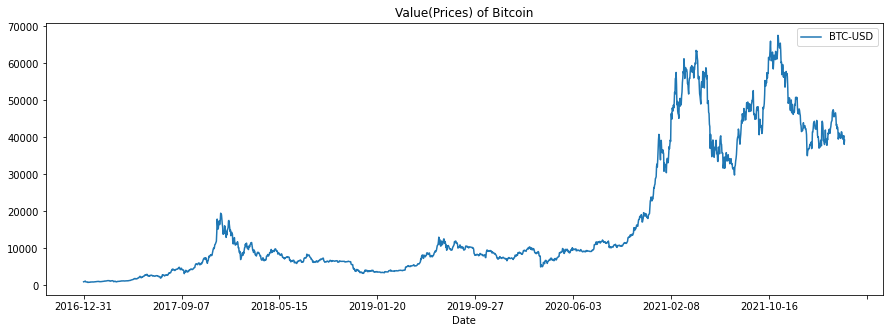

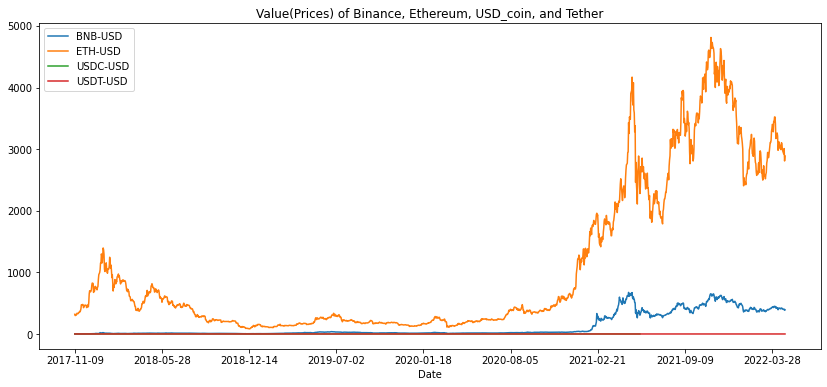

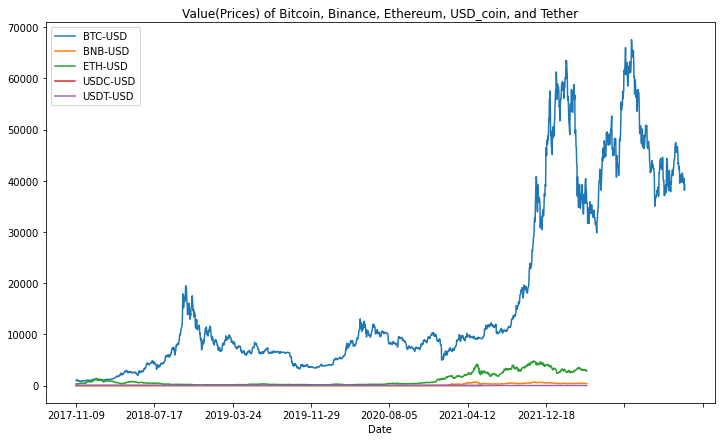

In [7]:

#Bicoin only
bitcoin['Close'].plot(label="BTC-USD",figsize=(15,5))
plt.title('Value(Prices) of Bitcoin')
plt.legend()
plt.show()

#other four large cap cryptos
binance['Close'].plot(label="BNB-USD", figsize=(14, 6))
ethereum['Close'].plot(label="ETH-USD")
usd_coin['Close'].plot(label="USDC-USD")
tether['Close'].plot(label="USDT-USD")
plt.title('Value(Prices) of Binance, Ethereum, USD_coin, and Tether')
plt.legend()
plt.show()
          
          
  #Combined 
Startdate = '2018-12-30'
Enddate = '2022-04-26'
underDaterange = []
bitcoin['Close'].plot(label="BTC-USD",figsize=(12,7))
binance['Close'].plot(label="BNB-USD")
ethereum['Close'].plot(label="ETH-USD")
usd_coin['Close'].plot(label="USDC-USD")
tether['Close'].plot(label="USDT-USD")

plt.title('Value(Prices) of Bitcoin, Binance, Ethereum, USD_coin, and Tether')
plt.legend()
plt.show()

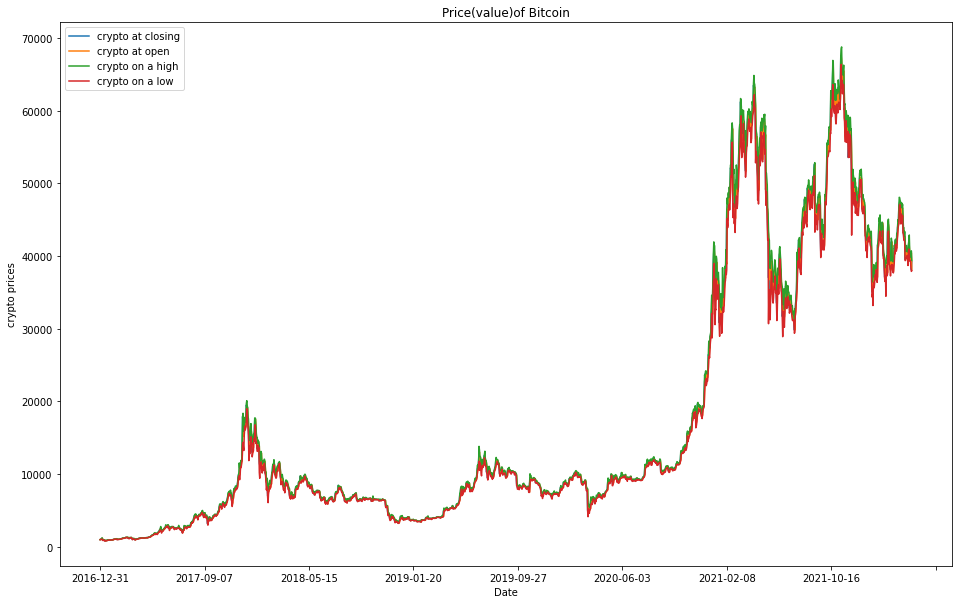

In [8]:
bitcoin['Close'].plot(label="crypto at closing", figsize=(16,10))
bitcoin['Open'].plot(label="crypto at open")
bitcoin['High'].plot(label="crypto on a high")
bitcoin['Low'].plot(label="crypto on a low")
plt.title('Price(value)of Bitcoin')
plt.legend()
plt.ylabel("crypto prices")
plt.show()

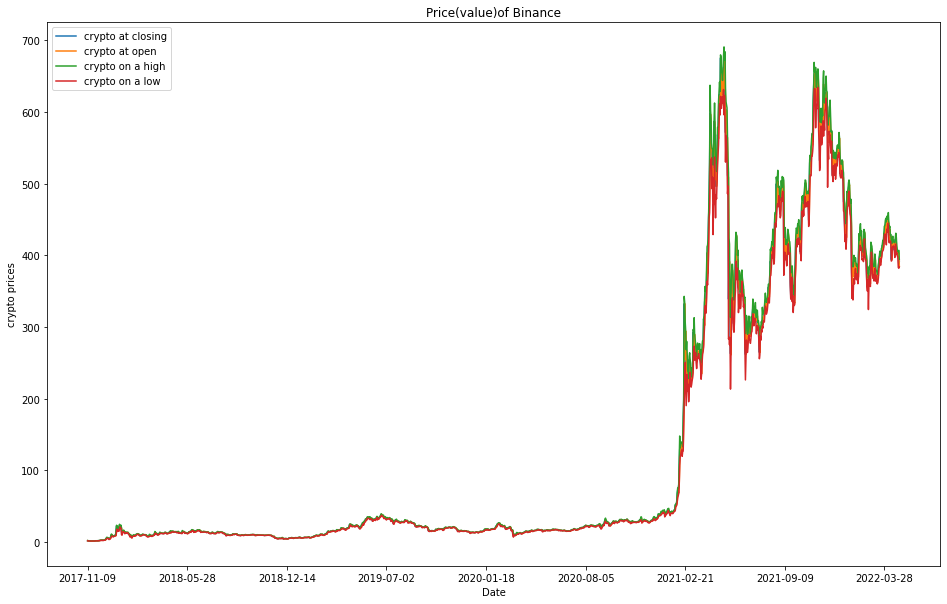

In [9]:
binance['Close'].plot(label="crypto at closing", figsize=(16,10))
binance['Open'].plot(label="crypto at open")
binance['High'].plot(label="crypto on a high")
binance['Low'].plot(label="crypto on a low")
plt.title('Price(value)of Binance')
plt.legend()
plt.ylabel("crypto prices")
plt.show()

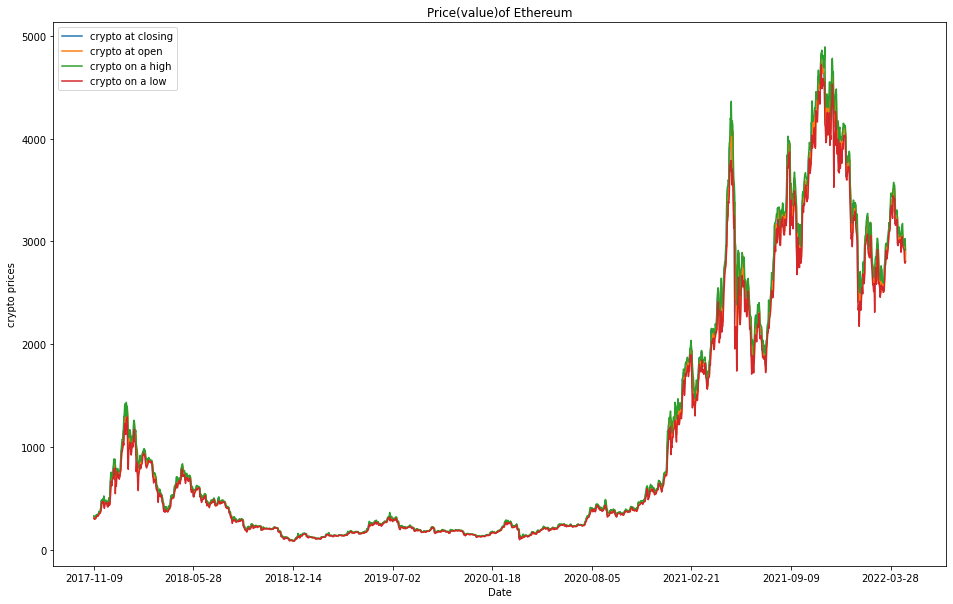

In [10]:
ethereum['Close'].plot(label="crypto at closing", figsize=(16,10))
ethereum['Open'].plot(label="crypto at open")
ethereum['High'].plot(label="crypto on a high")
ethereum['Low'].plot(label="crypto on a low")
plt.title('Price(value)of Ethereum')
plt.legend()
plt.ylabel("crypto prices")
plt.show()

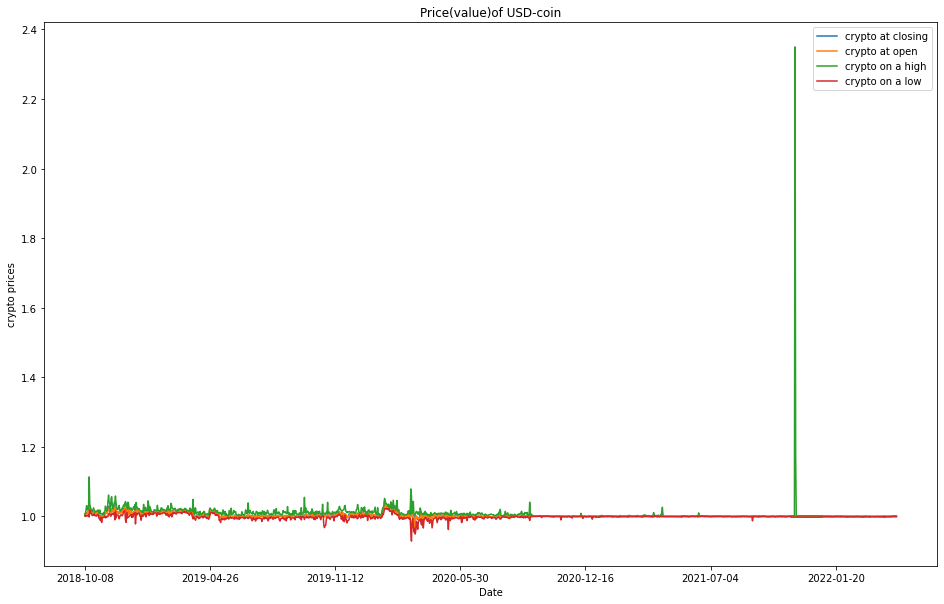

In [11]:
usd_coin['Close'].plot(label="crypto at closing", figsize=(16,10))
usd_coin['Open'].plot(label="crypto at open")
usd_coin['High'].plot(label="crypto on a high")
usd_coin['Low'].plot(label="crypto on a low")
plt.title('Price(value)of USD-coin')
plt.legend()
plt.ylabel("crypto prices")
plt.show()

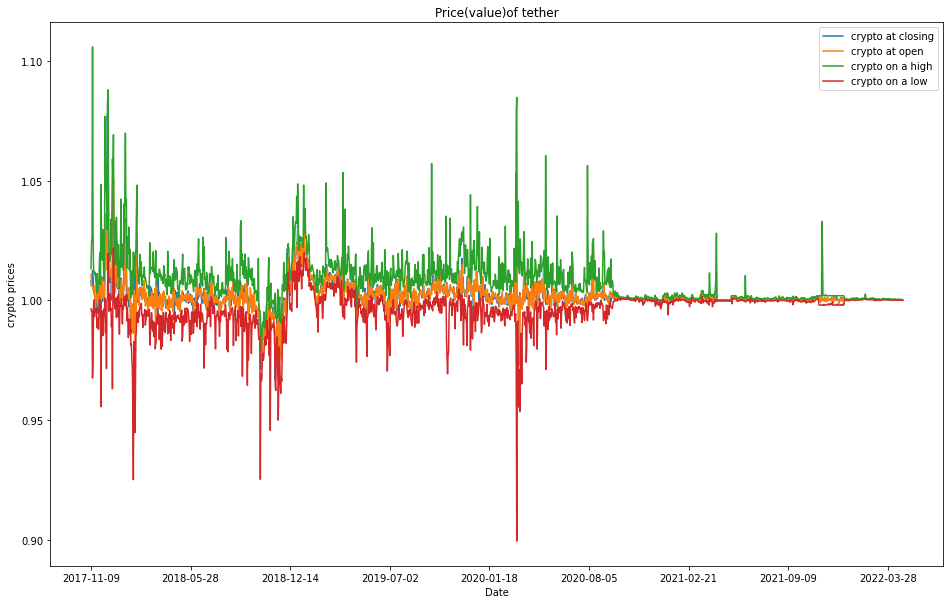

In [12]:
tether['Close'].plot(label="crypto at closing", figsize=(16,10))
tether['Open'].plot(label="crypto at open")
tether['High'].plot(label="crypto on a high")
tether['Low'].plot(label="crypto on a low")
plt.title('Price(value)of tether')
plt.legend()
plt.ylabel("crypto prices")
plt.show()

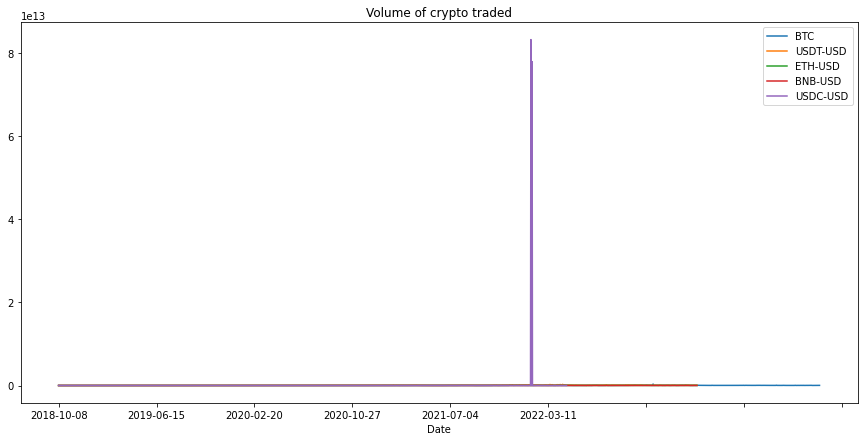

In [14]:
bitcoin['Volume'].plot(label = 'BTC', figsize = (15,7))
tether['Volume'].plot(label = "USDT-USD")
ethereum['Volume'].plot(label = "ETH-USD")
binance['Volume'].plot(label = "BNB-USD")
usd_coin['Volume'].plot(label = "USDC-USD")
plt.title('Volume of crypto traded')
plt.legend()

In [17]:
import pandas_datareader as pdr
import datetime
from pandas_datareader import data
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [18]:
start=datetime.datetime(2017,4,15)

end=datetime.datetime(2022,4,28)
ticker=['BTC-USD','BNB-USD','ETH-USD','USDC-USD', 'USDT-USD']
datas=data.DataReader(ticker, 'yahoo',start, end)

datas.head()


Attributes    Adj Close                                          Close  \
Symbols         BTC-USD BNB-USD ETH-USD USDC-USD USDT-USD      BTC-USD   
Date                                                                     
2017-04-15  1172.520020     NaN     NaN      NaN      NaN  1172.520020   
2017-04-16  1182.939941     NaN     NaN      NaN      NaN  1182.939941   
2017-04-17  1193.910034     NaN     NaN      NaN      NaN  1193.910034   
2017-04-18  1211.670044     NaN     NaN      NaN      NaN  1211.670044   
2017-04-19  1210.290039     NaN     NaN      NaN      NaN  1210.290039   

Attributes                                    ...         Open          \
Symbols    BNB-USD ETH-USD USDC-USD USDT-USD  ...      BTC-USD BNB-USD   
Date                                          ...                        
2017-04-15     NaN     NaN      NaN      NaN  ...  1167.300049     NaN   
2017-04-16     NaN     NaN      NaN      NaN  ...  1172.609985     NaN   
2017-04-17     NaN     NaN      NaN      NaN  ...  1183.250000     NaN   
2017-04-18     NaN     NaN      NaN      NaN  ...  1193.770020     NaN   
2017-04-19     NaN     NaN      NaN      NaN  ...  1212.130005     NaN   

Attributes                                 Volume                           \
Symbols    ETH-USD USDC-USD USDT-USD      BTC-USD BNB-USD ETH-USD USDC-USD   
Date                                                                         
2017-04-15     NaN      NaN      NaN  203559008.0     NaN     NaN      NaN   
2017-04-16     NaN      NaN      NaN  183231008.0     NaN     NaN      NaN   
2017-04-17     NaN      NaN      NaN  253206000.0     NaN     NaN      NaN   
2017-04-18     NaN      NaN      NaN  270524000.0     NaN     NaN      NaN   
2017-04-19     NaN      NaN      NaN  288060992.0     NaN     NaN      NaN   

Attributes           
Symbols    USDT-USD  
Date                 
2017-04-15      NaN  
2017-04-16      NaN  
2017-04-17      NaN  
2017-04-18      NaN  
2017-04-19      NaN  

[5 rows x 30 columns]

In [19]:

stocks = ["BTC-USD","BNB-USD","ETH-USD","USDC-USD", "USDT-USD"]
start = datetime.datetime(2017,4,15)
end = datetime.datetime(2022,4,28)

datas_crypto= pdr.DataReader(stocks, 'yahoo',start,end)
datas_crypto.tail()



Attributes     Adj Close                                               \
Symbols          BTC-USD     BNB-USD      ETH-USD  USDC-USD  USDT-USD   
Date                                                                    
2022-04-25  40458.308594  404.350281  3009.393555  1.000218  1.000145   
2022-04-26  38117.460938  385.483063  2808.298340  1.000127  1.000073   
2022-04-27  39241.121094  391.445831  2888.929688  1.000321  1.000153   
2022-04-28  39773.828125  406.718201  2936.940918  1.000029  1.000191   
2022-04-29  38609.824219  393.062164  2815.601807  1.000023  1.000020   

Attributes         Close                                               ...  \
Symbols          BTC-USD     BNB-USD      ETH-USD  USDC-USD  USDT-USD  ...   
Date                                                                   ...   
2022-04-25  40458.308594  404.350281  3009.393555  1.000218  1.000145  ...   
2022-04-26  38117.460938  385.483063  2808.298340  1.000127  1.000073  ...   
2022-04-27  39241.121094  391.445831  2888.929688  1.000321  1.000153  ...   
2022-04-28  39773.828125  406.718201  2936.940918  1.000029  1.000191  ...   
2022-04-29  38609.824219  393.062164  2815.601807  1.000023  1.000020  ...   

Attributes          Open                                               \
Symbols          BTC-USD     BNB-USD      ETH-USD  USDC-USD  USDT-USD   
Date                                                                    
2022-04-25  39472.605469  399.129913  2922.990234  0.999960  1.000346   
2022-04-26  40448.421875  404.268860  3008.946289  1.000192  1.000131   
2022-04-27  38120.300781  385.562164  2808.645996  1.000129  1.000059   
2022-04-28  39241.429688  391.438660  2888.849854  1.000310  1.000155   
2022-04-29  39768.617188  406.641724  2936.776611  1.000007  1.000200   

Attributes        Volume                                            \
Symbols          BTC-USD       BNB-USD       ETH-USD      USDC-USD   
Date                                                                 
2022-04-25  3.544573e+10  1.910708e+09  2.233269e+10  4.720363e+09   
2022-04-26  3.456909e+10  1.671964e+09  1.905205e+10  4.221565e+09   
2022-04-27  3.098102e+10  1.512587e+09  1.741928e+10  3.849489e+09   
2022-04-28  3.390370e+10  2.116381e+09  1.844352e+10  4.611632e+09   
2022-04-29  3.088299e+10  1.928210e+09  1.877104e+10  4.076411e+09   

Attributes                
Symbols         USDT-USD  
Date                      
2022-04-25  7.325665e+10  
2022-04-26  6.906830e+10  
2022-04-27  6.104333e+10  
2022-04-28  6.839209e+10  
2022-04-29  6.789967e+10  

[5 rows x 30 columns]

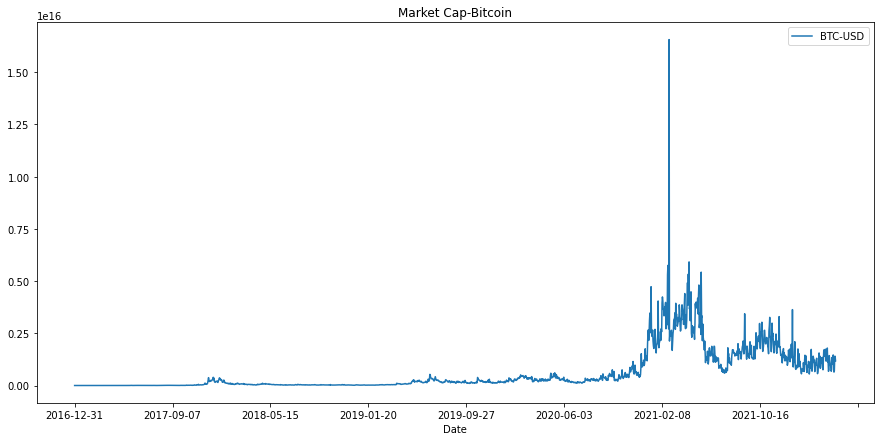

In [20]:
#Market Capitalisation bitcoin
bitcoin['MarktCap'] = bitcoin['Open'] * bitcoin['Volume']
bitcoin['MarktCap'].plot(label = 'BTC-USD', figsize = (15,7))
plt.title('Market Cap-Bitcoin')
plt.legend()

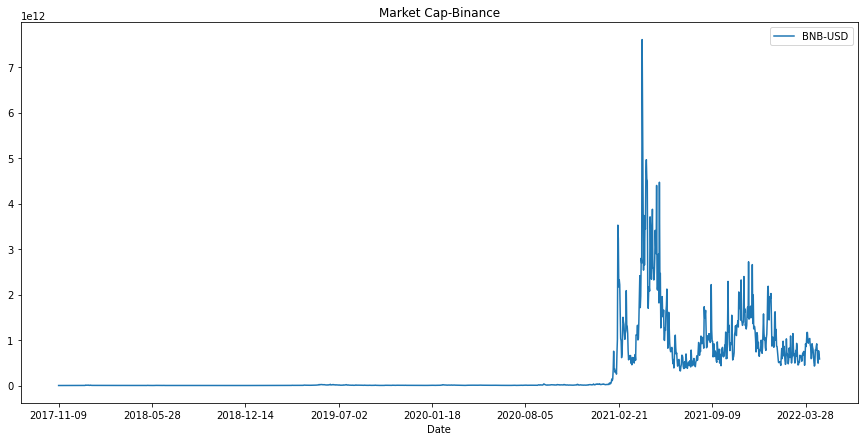

In [21]:
#Market Capitalisation
binance['MarktCap'] = binance['Open'] * binance['Volume']
binance['MarktCap'].plot(label = 'BNB-USD', figsize = (15,7))
plt.title('Market Cap-Binance')
plt.legend()

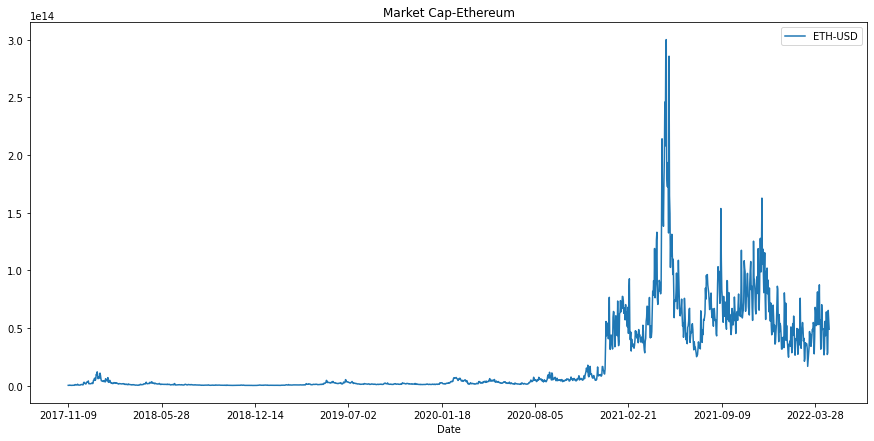

In [22]:
#Market Capitalisation Ethereum
ethereum['MarktCap'] = ethereum['Open'] * ethereum['Volume']
ethereum['MarktCap'].plot(label = 'ETH-USD', figsize = (15,7))
plt.title('Market Cap-Ethereum')
plt.legend()


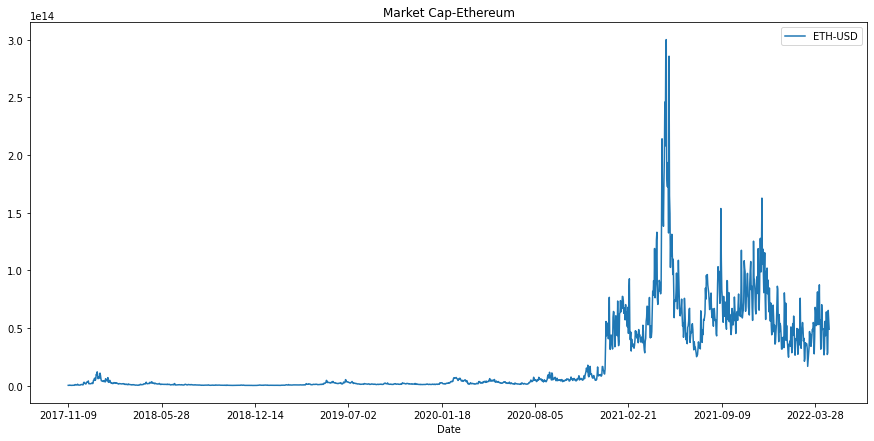

In [23]:
#Market Capitalisation Ethereum
ethereum['MarktCap'] = ethereum['Open'] * ethereum['Volume']
ethereum['MarktCap'].plot(label = 'ETH-USD', figsize = (15,7))
plt.title('Market Cap-Ethereum')
plt.legend()

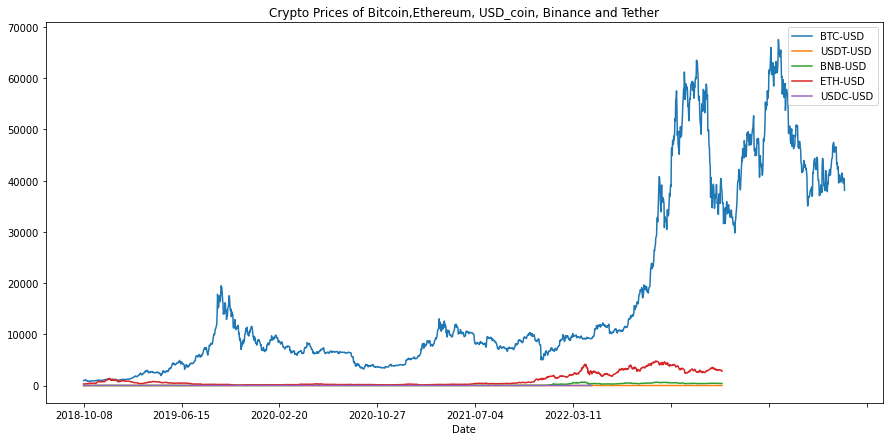

In [24]:
bitcoin['Open'].plot(label = 'BTC-USD', figsize = (15,7))
tether['Open'].plot(label = 'USDT-USD')
binance['Open'].plot(label = 'BNB-USD')
ethereum['Open'].plot(label = 'ETH-USD')
usd_coin['Open'].plot(label = 'USDC-USD')

plt.title('Crypto Prices of Bitcoin,Ethereum, USD_coin, Binance and Tether')
plt.legend()

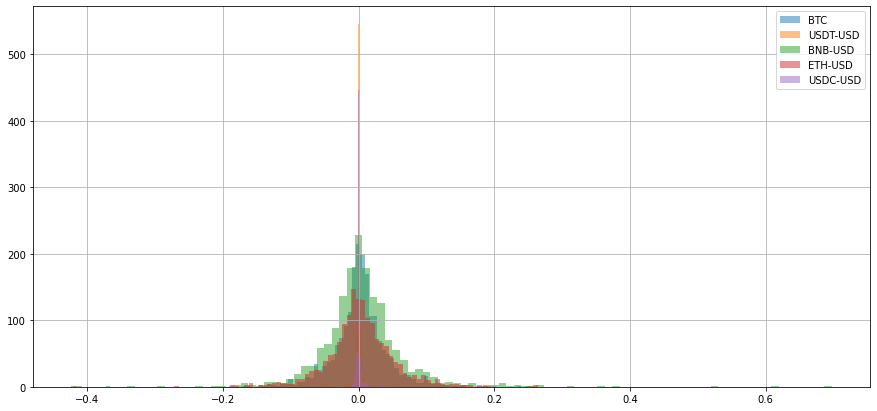

In [25]:
#Volatility 
bitcoin['returns'] = (bitcoin['Close']/bitcoin['Close'].shift(1)) -1
tether['returns'] = (tether['Close']/tether['Close'].shift(1))-1
binance['returns'] = (binance['Close']/binance['Close'].shift(1)) -1
usd_coin['returns'] = (usd_coin['Close']/usd_coin['Close'].shift(1))-1
ethereum['returns'] = (ethereum['Close']/ethereum['Close'].shift(1))-1
bitcoin['returns'].hist(bins = 100, label = 'BTC', alpha = 0.5, figsize = (15,7))
tether['returns'].hist(bins = 100, label = 'USDT-USD', alpha = 0.5)
binance['returns'].hist(bins = 100, label = 'BNB-USD', alpha = 0.5)
ethereum['returns'].hist(bins = 100, label = 'ETH-USD', alpha = 0.5)
usd_coin['returns'].hist(bins = 100, label = 'USDC-USD', alpha = 0.5)
plt.legend()

In [26]:
#Calculating SMA
bitcoin['SMA_long_BTC']=talib.SMA(bitcoin['Close'], timeperiod=100)
bitcoin['SMA_short_BTC']=talib.SMA(bitcoin['Close'], timeperiod=50)


In [27]:
#Calculation of price momentum
def MOM(bitcoin, n):   
    MOM = pd.Series(bitcoin.diff(n), name='Momentum_' + str(n))   
    return MOM
bitcoin['MOM21'] = MOM(bitcoin['Close'], 21)
bitcoin['MOM63'] = MOM(bitcoin['Close'], 63)

In [28]:
#calculation of rate of change
def ROC(bitcoin, n):  
    M = bitcoin.diff(n - 1)  
    N = bitcoin.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC
bitcoin['ROC21'] = ROC(bitcoin['Close'], 21)
bitcoin['ROC63'] = ROC(bitcoin['Close'], 63)

In [29]:
#calculation of exponential moving average
def EMA(bitcoin, n):
    EMA = pd.Series(bitcoin['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA
bitcoin['EMA21'] = EMA(bitcoin, 21)
bitcoin['EMA63'] = EMA(bitcoin, 63)
bitcoin['EMA252'] = EMA(bitcoin, 252)

In [30]:
#calculation of relative strength index
# Calculating RSI
bitcoin['RSI_21']=talib.RSI(bitcoin['Close'], timeperiod=21)
bitcoin['RSI_63']=talib.RSI(bitcoin['Close'], timeperiod=63)
print(bitcoin.head())


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2016-12-31   960.627014   963.742981   947.236023   963.742981   963.742981   
2017-01-01   963.658020  1003.080017   958.698975   998.325012   998.325012   
2017-01-02   998.617004  1031.390015   996.702026  1021.750000  1021.750000   
2017-01-03  1021.599976  1044.079956  1021.599976  1043.839966  1043.839966   
2017-01-04  1044.400024  1159.420044  1044.400024  1154.729980  1154.729980   

                 Volume      MarktCap   returns  SMA_long_BTC  SMA_short_BTC  \
Date                                                                           
2016-12-31   99135104.0  9.523186e+10       NaN           NaN            NaN   
2017-01-01  147775008.0  1.424046e+11  0.035883           NaN            NaN   
2017-01-02  222184992.0  2.218777e+11  0.023464           NaN            NaN   
2017-01-03  185168000.0  1.891676e+11  0.02162

In [31]:
# Initialize the `signals` DataFrame with the `signal` column
bitcoin['signal'] = 0.0

# Create short simple moving average over the short window
bitcoin['short_mavg'] = bitcoin['Close'].rolling(window=50, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
bitcoin['long_mavg'] = bitcoin['Close'].rolling(window=100, min_periods=1, center=False).mean()

# Create signals
bitcoin['signal'] = np.where(bitcoin['short_mavg'] > bitcoin['long_mavg'], 1.0, 0.0) 

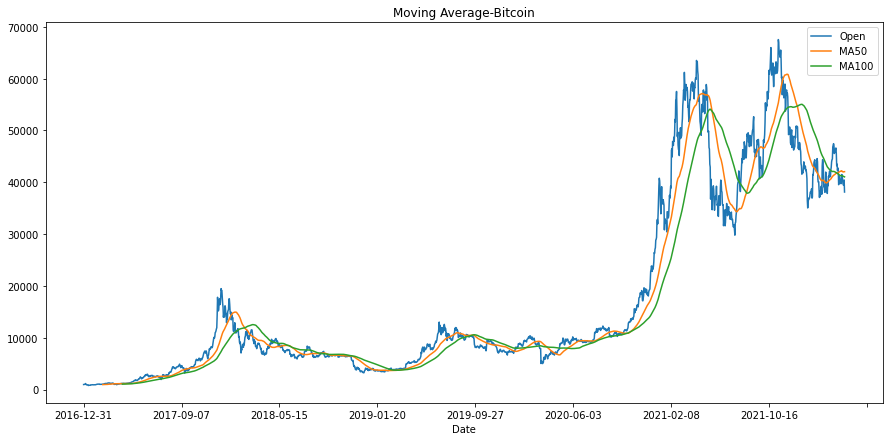

In [32]:

bitcoin['MA50']= bitcoin['Open'].rolling(50).mean()
bitcoin['MA100'] = bitcoin['Open'].rolling(100).mean()
bitcoin['Open'].plot(figsize = (15,7))
bitcoin['MA50'].plot()
bitcoin['MA100'].plot()
plt.title('Moving Average-Bitcoin')
plt.legend()
plt.show()



In [33]:
#Calculation of moving average
def MA(bitcoin, n):
    MA = pd.Series(bitcoin['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
bitcoin['MA50'] = MA(bitcoin, 50)
bitcoin['MA100'] = MA(bitcoin, 100)
bitcoin.tail()

,Open,High,Low,Close,Adj Close,Volume,MarktCap,returns,SMA_long_BTC,SMA_short_BTC,...,EMA21,EMA63,EMA252,RSI_21,RSI_63,signal,short_mavg,long_mavg,MA50,MA100
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-24,39478.375000,39845.925781,39233.539063,39469.292969,39469.292969,1.796440e+10,7.092052e+14,-0.000442,41125.033125,42016.576016,...,41211.744059,42006.164493,44173.026091,42.957625,46.880190,1.0,42016.576016,41125.033125,42016.576016,41125.033125
2022-04-25,39472.605469,40491.753906,38338.378906,40458.308594,40458.308594,3.544573e+10,1.399135e+15,0.025058,41097.842227,42057.342500,...,41143.249925,41957.793997,44143.660730,46.258119,47.733413,1.0,42057.342500,41097.842227,42057.342500,41097.842227
2022-04-26,40448.421875,40713.890625,37884.984375,38117.460938,38117.460938,3.456909e+10,1.398265e+15,-0.057858,41047.878047,42058.450938,...,40868.178199,41837.783588,44096.022777,40.442703,45.958052,1.0,42058.450938,41047.878047,42058.450938,41047.878047
2022-04-27,38120.300781,39397.917969,37997.312500,39241.121094,39241.121094,3.098102e+10,1.181006e+15,0.029479,41017.783750,42068.527969,...,40720.263917,41756.637886,44057.644100,43.991628,46.920989,1.0,42068.527969,41017.783750,42068.527969,41017.783750
2022-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40720.263917,41756.637886,44057.644100,NaN,NaN,1.0,42070.274952,41004.068103,NaN,NaN


In [34]:
#Dealing with rows that contain NAN

bitcoin.isnull().sum()
bitcoinub=bitcoin.dropna()
bitcoinub.isnull().sum()
bitcoinub.head()

,Open,High,Low,Close,Adj Close,Volume,MarktCap,returns,SMA_long_BTC,SMA_short_BTC,...,EMA21,EMA63,EMA252,RSI_21,RSI_63,signal,short_mavg,long_mavg,MA50,MA100
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-08,4605.160156,4661.000000,4075.179932,4228.750000,4228.750000,2.700890e+09,1.243803e+13,-0.080683,3135.911199,3726.236992,...,4335.266647,3674.026619,2583.474203,54.347766,59.092517,1.0,3726.236992,3135.911199,3726.236992,3135.911199
2017-09-09,4229.810059,4308.819824,4114.109863,4226.060059,4226.060059,1.386230e+09,5.863490e+12,-0.000636,3154.093001,3757.402993,...,4325.338775,3691.283268,2598.472851,54.293808,59.068054,1.0,3757.402993,3154.093001,3757.402993,3154.093001
2017-09-10,4229.339844,4245.439941,3951.040039,4122.939941,4122.939941,1.679090e+09,7.101442e+12,-0.024401,3170.436899,3783.659390,...,4306.938881,3704.776785,2612.375897,52.207431,58.130633,1.0,3783.659390,3170.436899,3783.659390,3170.436899
2017-09-11,4122.470215,4261.669922,4099.399902,4161.270020,4161.270020,1.557330e+09,6.420047e+12,0.009297,3186.896099,3812.276792,...,4293.696257,3719.046547,2626.484576,52.913624,58.380108,1.0,3812.276792,3186.896099,3812.276792,3186.896099
2017-09-12,4168.879883,4344.649902,4085.219971,4130.810059,4130.810059,1.864530e+09,7.773002e+12,-0.007320,3203.086099,3839.795791,...,4278.888421,3731.917957,2640.170811,52.269176,58.100564,1.0,3839.795791,3203.086099,3839.795791,3203.086099


In [35]:
   def handle_data(context, data):
        #Calculationg moving average
        MA2 = bitcoin[context.security].mavg(100),
        MA1 = bitcoin[context.security].mavg(50)
        
        #Calculating price
        date = str(bitcoin[context.security].datetime)[:10]
        current_price =bitcoin[context.security].price
        current_positions = context.portfolio.positions[symbol('AAPL')].amount
        cash = context.portfolio.cash
        value = context.portfolio.portfolio_value
        current_pnl = context.portfolio.pnl
        

In [36]:

#code (this will come under handle_data function only)
if (MA1> MA2) and current_positions==0:
    number_of_shares = int(cash/current_price)
    order(context.security, number_of_shares)
    record(date=date,MA50 = MA100, MA100 = MA100, Price= 
current_price,status="buy",shares=number_of_shares,PnL=current_pnl,cash=cash,value=value)

elif (MA1 < MA2) and current_positions != 0:
     order_target(context.security, 0)
     record(date=date,MA1 = MA1, MA2 = MA2, Price= current_price,status="sell",shares="--",PnL=current_pnl,cash=cash,value=value)

else:
    record(date=date,MA1 = MA1, MA2 = MA2, Price= current_price,status="--",shares="--",PnL=current_pnl,cash=cash,value=value)
        



NameError: name 'MA1' is not defined

In [37]:
# This ensures that our graphs will be shown properly in the notebook.
%matplotlib inline

# Import Zipline functions that we need
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol

# Import date and time zone libraries
from datetime import datetime
import pytz

# Import visualization
import matplotlib.pyplot as plt


def initialize(context):
    # Which stock to trade
    context.stock = symbol('AAPL')
    
    # Moving average window
    context.index_average_window = 100
    
def handle_data(context, data):
    # Request history for the stock
    equities_hist = data.history(context.stock, "close", 
                                 context.index_average_window, "1d")
    
    # Check if price is above moving average
    if equities_hist[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0
    
    # Place order
    order_target_percent(context.stock, stock_weight)

def analyze(context, perf):
    fig = plt.figure(figsize=(12, 8))
    
    # First chart
    ax = fig.add_subplot(311)
    ax.set_title('Strategy Results')
    ax.semilogy(perf['portfolio_value'], linestyle='-', 
                label='Equity Curve', linewidth=3.0)
    ax.legend()
    ax.grid(False)
    
    # Second chart
    ax = fig.add_subplot(312)
    ax.plot(perf['gross_leverage'], 
            label='Exposure', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)

    # Third chart
    ax = fig.add_subplot(313)
    ax.plot(perf['returns'], label='Returns', linestyle='-.', linewidth=1.0)
    ax.legend()
    ax.grid(True)

# Set start and end date
start_date = datetime(2000, 1, 1, tzinfo=pytz.UTC)
end_date = datetime(2022, 1, 1, tzinfo=pytz.UTC)
 

NameError: name 'upper' is not defined

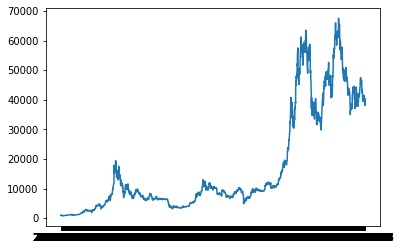

In [38]:
#let's plot the Bollinger Bands
plt.plot(bitcoin['Close'], label='price')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Midle band')
plt.plot(lower, label='Lower band')
figsize=(100,7)
plt.title('Bollinger Band-bitcoin Stock')
plt.legend()
plt.show()

NameError: name 'upper' is not defined

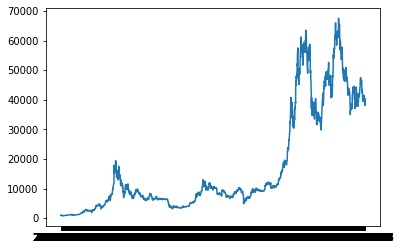

In [40]:

#let's plot the Bollinger Bands
plt.plot(bitcoin['Close'], label='price')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Midle band')
plt.plot(lower, label='Lower band')
figsize=(100,7)
plt.title('Bollinger Band-Bitcoin Stock')
plt.legend()
plt.show()

array([[<AxesSubplot:xlabel='bitcoinOpen', ylabel='bitcoinOpen'>,
        <AxesSubplot:xlabel='tetherOpen', ylabel='bitcoinOpen'>,
        <AxesSubplot:xlabel='binanceOpen', ylabel='bitcoinOpen'>,
        <AxesSubplot:xlabel='usd_coinOpen', ylabel='bitcoinOpen'>,
        <AxesSubplot:xlabel='ethereumOpen', ylabel='bitcoinOpen'>],
       [<AxesSubplot:xlabel='bitcoinOpen', ylabel='tetherOpen'>,
        <AxesSubplot:xlabel='tetherOpen', ylabel='tetherOpen'>,
        <AxesSubplot:xlabel='binanceOpen', ylabel='tetherOpen'>,
        <AxesSubplot:xlabel='usd_coinOpen', ylabel='tetherOpen'>,
        <AxesSubplot:xlabel='ethereumOpen', ylabel='tetherOpen'>],
       [<AxesSubplot:xlabel='bitcoinOpen', ylabel='binanceOpen'>,
        <AxesSubplot:xlabel='tetherOpen', ylabel='binanceOpen'>,
        <AxesSubplot:xlabel='binanceOpen', ylabel='binanceOpen'>,
        <AxesSubplot:xlabel='usd_coinOpen', ylabel='binanceOpen'>,
        <AxesSubplot:xlabel='ethereumOpen', ylabel='binanceOpen'>],
       [<

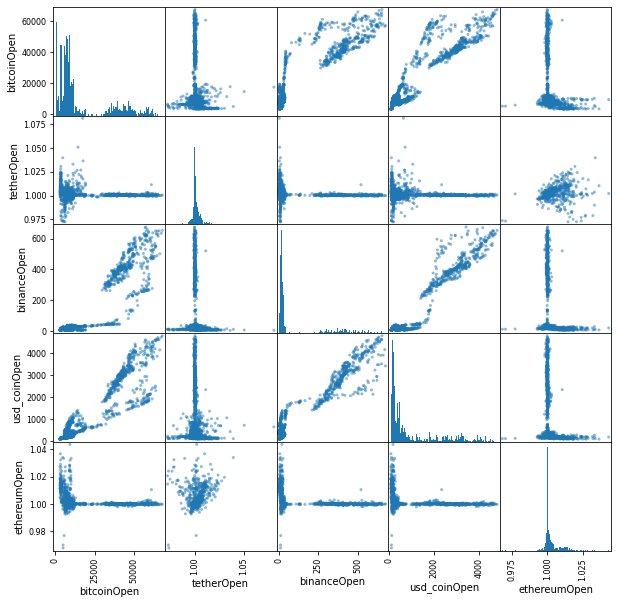

In [39]:
data = pd.concat([bitcoin['Open'],tether['Open'], binance['Open'], ethereum['Open'], usd_coin['Open']],axis = 1)
data.columns = ['bitcoinOpen','tetherOpen', 'binanceOpen','usd_coinOpen','ethereumOpen' ]
scatter_matrix(data, figsize = (10,10), hist_kwds= {'bins':250})

In [ ]:
#Conclusion
#The above analysis can be used to understand a stock’s short-term and long-term behaviour. A decision support system can be created which stock to pick from industry for low-risk low gain or high-risk high gain depending on the risk apatite of the investor.